## INIT

In [273]:
## Read csvs
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)
#Create dftrain and test
y_train=train_df["label"]
X_train=train_df.drop("label",axis=1)
X_test=test_df
print(X_train.shape,X_test.shape,y_train.shape)

def distplot_with_hue(data=None, x=None, hue=None, row=None, col=None, legend=True, **kwargs):
    sns.set(rc={'figure.figsize':(5,5)})
    _, bins = np.histogram(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col,size=10)
    g.map(sns.distplot, x, **kwargs)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue) 
        
#Columns :['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images',
#'urls','salutations', 'designation', 'chars_in_subject', 'chars_in_body']
#Numerical images, urls, css, chars_in_subject, chars_in_body  Scalee This Shit
#Binary bcced, designation, salutations
#Categorical org, tld, mail_type
#df.describe()

#Merge 2 daframes for exploration and cleaning
df=pd.concat([X_train,X_test],axis=0)
print(df.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(25066, 12) (10745, 12) (25066,)


<IPython.core.display.Javascript object>

(35811, 12)


## Cleaning

### 1-1 ORG

In [274]:
#Categorical org, tld, mail_type
df.org=df.org.str.lower()
df.tld=df.tld.str.lower()
df.mail_type=df.mail_type.str.lower()

In [275]:
#filter org
p=pd.DataFrame(df.org.value_counts())
listofallorg=list(p.index)
freq_org=['iiitd', 'usebackpack', 'amazon', 'quora', 'linkedin', 'twitter',
       'google', 'youtube', 'nrsc', 'coursera', 'topcoder', 'phpclasses',
       'flipkartletters', 'udacity', 'centralesupelec', 'github',
       'sampark', 'reply', 'hackerearth', 'medium', 'nvidia', 'mailer',
       'mail', 'news', 'sbi', 'e', 'email', 'mentor', 'indiatimes',
       'kaggle', 'newsletter', 'hackerrankmail', 'm', 'freshersworld',
       'redwolf', 'notifications', 'hackerrank', 'send', 'ieee', 'crm',
       'aamaadmiparty', 'statebankrewardz', 'glassdoor', 'duolingo',
       'edx', 'gmail', 'e-mail', 'piazza', 'springboard', 'updates',
       'angel', 'brilliant', 'academia-mail', 'change', 'facebookmail',
       'crazydomains', 'codechef']
notwantedorg=list(set(listofallorg)-set(freq_org))
df["org"]=df["org"].replace(notwantedorg, 'rare')

#To bins 
q4_list=['iiitd', 'usebackpack', 'amazon', 'quora', 'linkedin',
       'twitter', 'google', 'youtube']
q3_list=['nrsc','coursera', 'topcoder','phpclasses','flipkartletters', 'udacity',
         'centralesupelec','github', 'sampark', 'reply']
q2_list=['hackerearth', 'medium', 'nvidia',
       'mailer', 'mail','news', 'sbi', 'email','e', 'mentor','indiatimes']
q1_list=['kaggle', 'newsletter', 'hackerrankmail','m','freshersworld', 'redwolf', 'notifications', 'hackerrank','send','ieee', 'crm',
         'statebankrewardz', 'aamaadmiparty', 'glassdoor',
       'duolingo', 'edx', 'gmail', 'e-mail', 'piazza', 'springboard',
       'updates', 'angel', 'brilliant', 'academia-mail', 'facebookmail',
       'change', 'crazydomains', 'codechef','rare']

#Replace org

df["org_bin"]=df["org"]
df["org_bin"]=df["org_bin"].replace(q4_list, 'Q4')
df["org_bin"]=df["org_bin"].replace(q3_list, 'Q3')
df["org_bin"]=df["org_bin"].replace(q2_list, 'Q2')
df["org_bin"]=df["org_bin"].replace(q1_list, 'Q1')


#Testing
#df.org=df.org.str.lower()
#print(df.org_bin.value_counts().to_string())

<IPython.core.display.Javascript object>

### 1-2 TLD

In [276]:
#filter org
t=pd.DataFrame(df.tld.value_counts())
listofalltld=list(t.index)
freq_tld=['com', 'ac.in', 'in', 'org', 'gov.in', 'fr', 'co.in', 'net',
       'foodpanda.in', 'ebay.in', 'netflix.com', 'mail.coursera.org',
       'intercom-mail.com', 'speakingtree.in', 'grammarly.com',
       'microsoft.com', 'freelancer.com', 'bookmyshow.com',
       'sdconnect.in', 'co', 'google.com', 'linkedin.com', 'efinmail.com',
       'goodreads.com', 'nvidia.com', 'pytorch.org', 'ai',
       'pinterest.com', 'paypal.com', 'xoom.com', 'goindigo.in', 'org.in',
       'jabong.com', 'travel-makemytrip.com', 'gov', 'wfp.org',
       'paytm.com', 'asus.com', 'apple.com', 'instagram.com',
       'evernote.com', 'hp.com', 'edu', 'ibm.com', 'social.saavn.com',
       'skype.com', 'info', 'tripadvisor.com', 'kotak.in', 'email',
       'payback.in', 'cardekho.com', 'vincerowatches.com', 'iitm.ac.in',
       'itunes.com', 'twitter.com', 'ORG', 'digitalglobe.com', 'ieee.org',
       'olacabs.com', 'amerinoc.com', 'caisse-epargne.fr', 'icims.com',
       'quoramail.com', 'newyorktimes.com', 'cardekhomailer.com', 'pro',
       'hostingdepago.com', 'join.me', 'io', 'emails-makemytrip.com',
       'godaddy.com', 'mozilla.org', 'udacity.com', 'codeproject.com',
       'mil']
notwantedtld=list(set(listofalltld)-set(freq_tld))
df["tld"]=df["tld"].replace(notwantedtld, 'rare')


#To bins 
q4_list=['com', 'ac.in', 'in', 'org', 'gov.in']
q3_list=['fr', 'co.in',
       'net', 'foodpanda.in','ebay.in', 'netflix.com',
       'mail.coursera.org', 'intercom-mail.com',
        'speakingtree.in',
       'grammarly.com', 'microsoft.com', 'freelancer.com',
       'bookmyshow.com','sdconnect.in', 'co', 'google.com',
       'linkedin.com', 'efinmail.com']
q2_list=['goodreads.com', 'nvidia.com',
       'pytorch.org', 'ai', 'pinterest.com', 'paypal.com', 'xoom.com',
       'goindigo.in', 'org.in', 'jabong.com', 'travel-makemytrip.com',
       'gov', 'wfp.org','paytm.com', 'asus.com', 'apple.com',
       'instagram.com']
q1_list=['evernote.com', 'hp.com', 'edu', 'ibm.com',
       'social.saavn.com', 'skype.com', 'info', 'tripadvisor.com',
       'kotak.in', 'email', 'payback.in', 'cardekho.com',
       'vincerowatches.com', 'twitter.com', 'iitm.ac.in', 'itunes.com',
         "ORG",'digitalglobe.com', 'ieee.org', 'olacabs.com',
       'amerinoc.com', 'quoramail.com', 'caisse-epargne.fr', 'icims.com',
       'newyorktimes.com', 'cardekhomailer.com', 'pro', 'join.me', 'io',
       'hostingdepago.com', 'godaddy.com', 'mozilla.org',
       'emails-makemytrip.com', 'udacity.com', 'codeproject.com', 'mil',"rare"]

#Replace org
df["tld_bin"]=df["tld"]
df["tld_bin"]=df["tld_bin"].replace(q4_list, 'Q4')
df["tld_bin"]=df["tld_bin"].replace(q3_list, 'Q3')
df["tld_bin"]=df["tld_bin"].replace(q2_list, 'Q2')
df["tld_bin"]=df["tld_bin"].replace(q1_list, 'Q1')

#Testing
#df.tld=df.tld.str.lower()
#print(df.tld_bin.value_counts().to_string())

<IPython.core.display.Javascript object>

### 1-3 mail_type

In [277]:
df[["mail_type1","mail_type2"]]=df.mail_type.str.split("/",expand=True)
#df.drop("mail_type",axis=1,inplace=True)
#df[["mail_type1","mail_type2"]]

## 1-4 CCS

In [278]:
df["ccs_bin"]=pd.cut(df.ccs, [-0.1,0.9,5,20,180],labels=["s","m","l","xl"])

<IPython.core.display.Javascript object>

## Prep to Train

In [280]:
#Categorical data
df_cat=pd.get_dummies(df[["org_bin","tld_bin","mail_type1","mail_type2","ccs_bin"]])
df=pd.concat([df,df_cat],axis=1)

#Binary data
#No changes

#Numerical data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["images", "urls", "ccs", "chars_in_subject", "chars_in_body"]] = scaler.fit_transform(df[["images", "urls", "ccs", "chars_in_subject", "chars_in_body"]])

#Drop unused columns
df.drop(["date","org","tld","mail_type","org_bin","tld_bin","mail_type1","mail_type2","ccs_bin"],axis=1,inplace=True)

X_train=df.iloc[0:25066,:]
X_test=df.iloc[25066:,:]

print(X_train.shape,y_train.shape)
print(X_test.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(25066, 28) (25066,)
(10745, 28)


In [281]:
df.columns

Index(['ccs', 'bcced', 'images', 'urls', 'salutations', 'designation',
       'chars_in_subject', 'chars_in_body', 'org_bin_Q1', 'org_bin_Q2',
       'org_bin_Q3', 'org_bin_Q4', 'tld_bin_Q1', 'tld_bin_Q2', 'tld_bin_Q3',
       'tld_bin_Q4', 'mail_type1_multipart', 'mail_type1_text',
       'mail_type2_alternative', 'mail_type2_html', 'mail_type2_idm',
       'mail_type2_mixed', 'mail_type2_plain', 'mail_type2_related',
       'ccs_bin_s', 'ccs_bin_m', 'ccs_bin_l', 'ccs_bin_xl'],
      dtype='object')

## Modeling

In [282]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import EnsembleVoteClassifier
import xgboost as xgb #xgb.XGBClassifier
import catboost as cb #cb.CatBoostClassifier
import lightgbm as lgb

#X=x_train
#y_train
#y=y_augm
        
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
results = cross_val_score(clf, X_train, y_train, cv=5,scoring='accuracy')
print("The mean score with cross validation is ",results.mean())
pred=clf.predict(X_test)
#score_test=sklearn.metrics.accuracy_score(y_test["Survived"], pred)
#print("The score with testing set is ",score_test)
#Best score : 0.9174576336865196  RandomForestClassifier(n_estimators=120, random_state=1,max_depth=10)

feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances['features']=feature_importances.index

The mean score with cross validation is  0.9182156548538221


<IPython.core.display.Javascript object>

In [283]:
feature_importances

,importance,features
urls,0.176398,urls
chars_in_body,0.162278,chars_in_body
images,0.138141,images
chars_in_subject,0.112360,chars_in_subject
org_bin_Q4,0.082407,org_bin_Q4
ccs_bin_s,0.054017,ccs_bin_s
ccs,0.042210,ccs
org_bin_Q1,0.032054,org_bin_Q1
ccs_bin_m,0.030743,ccs_bin_m
salutations,0.028976,salutations


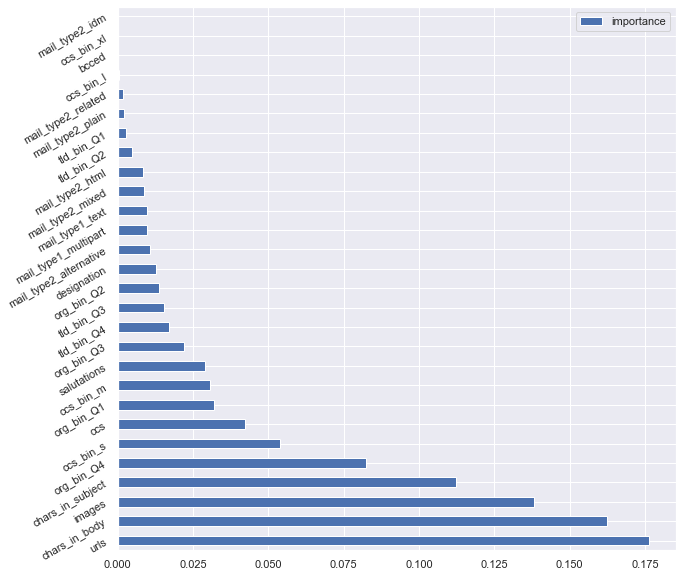

In [284]:
feature_importances.plot.barh(rot=30,figsize=(10,10))

In [285]:
## Save results to submission file
pred_df = pd.DataFrame(pred, columns=['label'])
pred_df.to_csv("sample_submission.csv", index=True, index_label='Id')

<IPython.core.display.Javascript object>

## Exploration

### 2-1 ORG

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

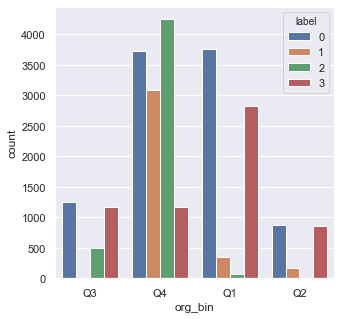

In [56]:
sns.set(rc={'figure.figsize':(5,5)})
#sns.barplot(x=df.iloc[0:25066,:].org_bin,hue=y_train)
sns.countplot(x=df.iloc[0:25066,:].org_bin,hue=y_train)

### 2-2 TLD

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

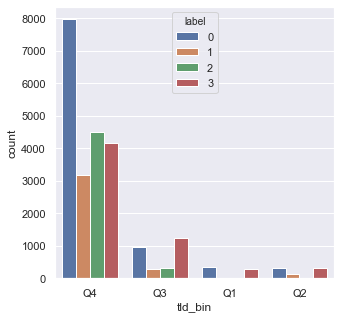

In [55]:
sns.set(rc={'figure.figsize':(5,5)})
#sns.barplot(x=df.iloc[0:25066,:].tld_bin,hue=y_train)
sns.countplot(x=df.iloc[0:25066,:].tld_bin,hue=y_train)

### 2-3 Mail_type 1 & 2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

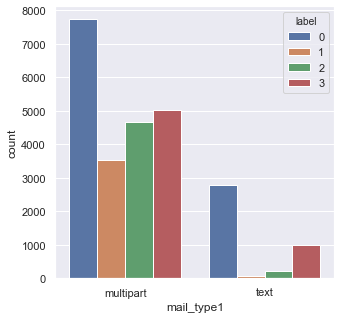

In [80]:
sns.set(rc={'figure.figsize':(5,5)})
#sns.barplot(x=df.iloc[0:25066,:].tld_bin,hue=y_train)
sns.countplot(x=df.iloc[0:25066,:].mail_type1,hue=y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

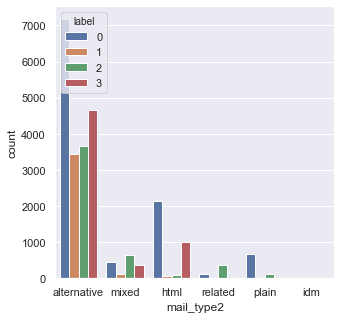

In [81]:
sns.set(rc={'figure.figsize':(5,5)})
#sns.barplot(x=df.iloc[0:25066,:].tld_bin,hue=y_train)
sns.countplot(x=df.iloc[0:25066,:].mail_type2,hue=y_train)

## 2-4 BCCED

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

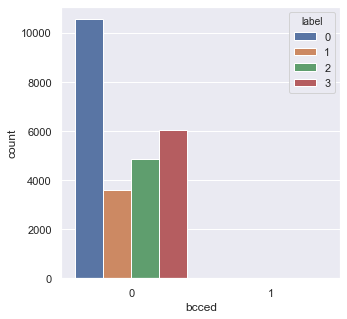

In [95]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df.iloc[0:25066,:].bcced,hue=y_train)

## 2-5 ccs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

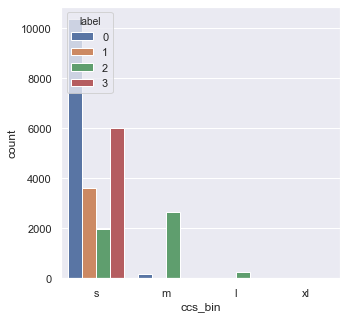

In [152]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df.iloc[0:25066,:].ccs_bin,hue=y_train)

## 2-6 designation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

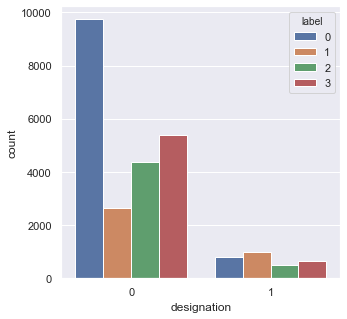

In [100]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df.iloc[0:25066,:].designation,hue=y_train)

## 2-7 salutations

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

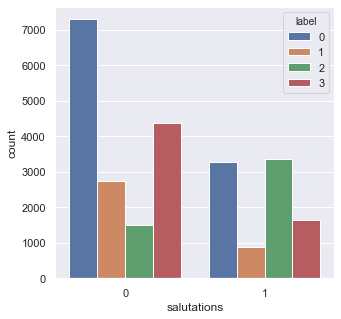

In [101]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df.iloc[0:25066,:].salutations,hue=y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

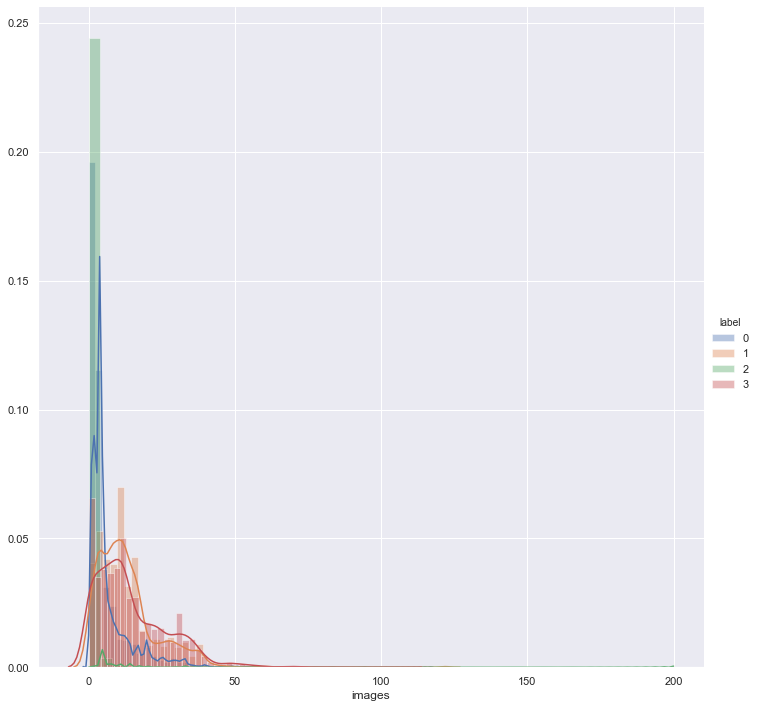

In [167]:
distplot_with_hue(data=train_df,x="images",hue="label")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

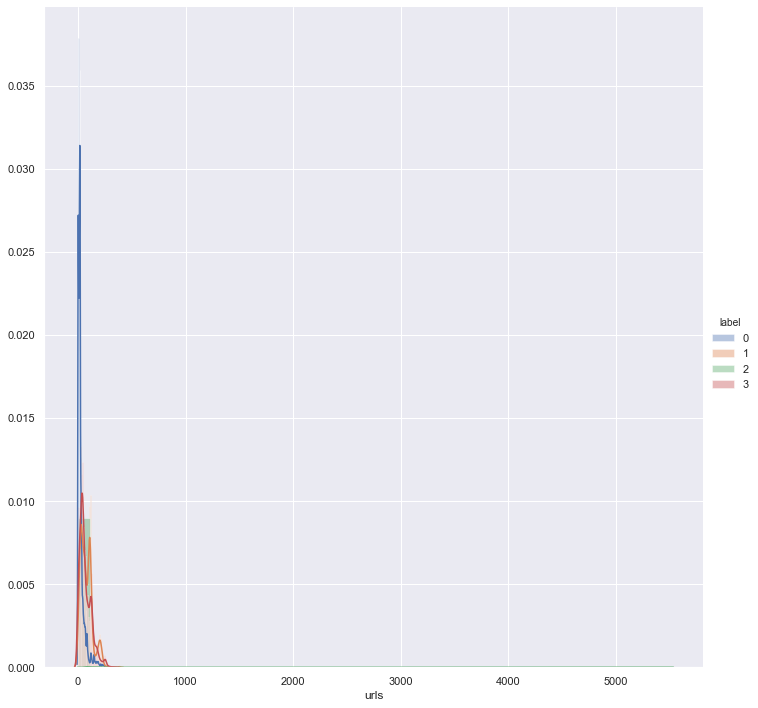

In [168]:
distplot_with_hue(data=train_df,x="urls",hue="label")

In [ ]:
distplot_with_hue(data=train_df,x="images",hue="label")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

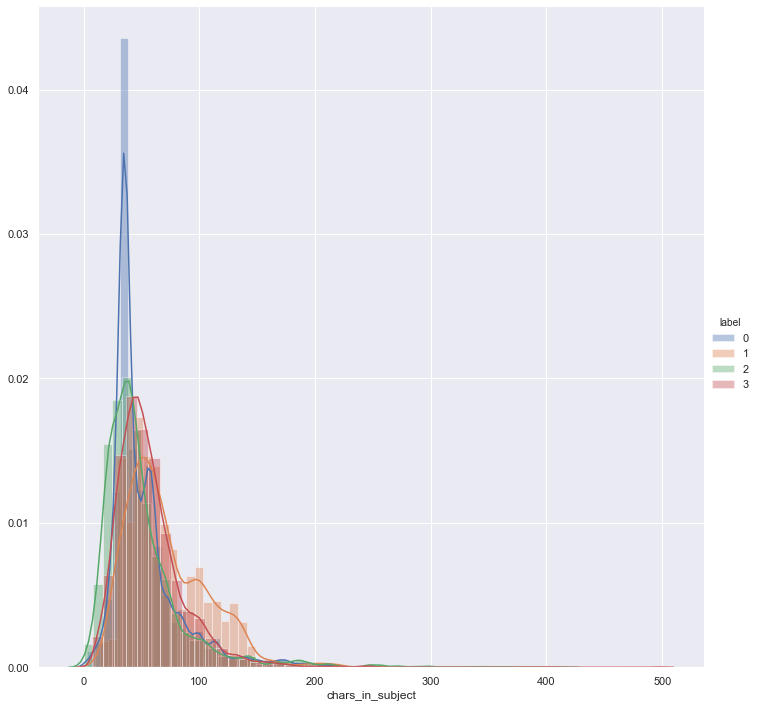

In [169]:
distplot_with_hue(data=train_df,x="chars_in_subject",hue="label")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

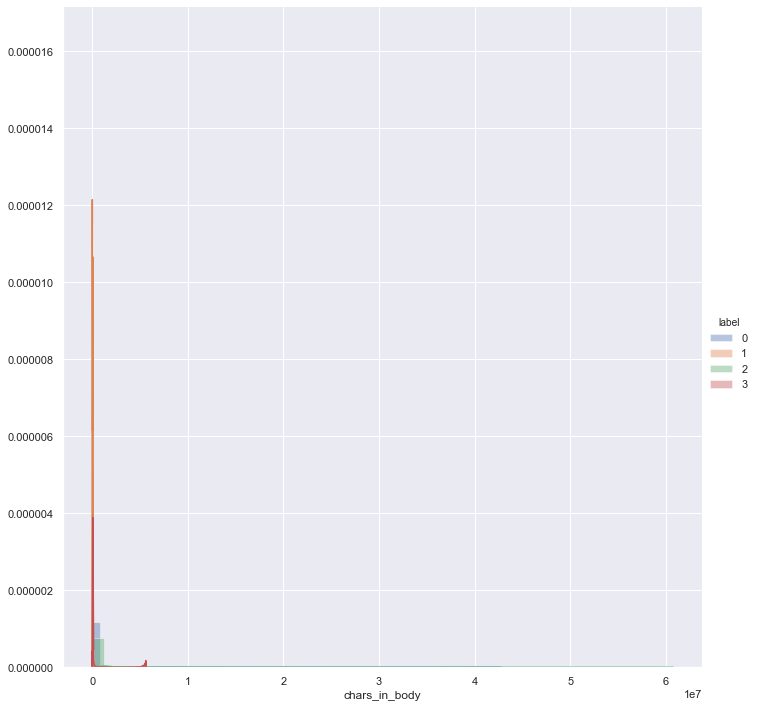

In [170]:
distplot_with_hue(data=train_df,x="chars_in_body",hue="label")

In [286]:
train_df.label.value_counts()

0    10549
3     6036
2     4874
1     3607
Name: label, dtype: int64